# Emotion Recognizer

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

## Loading data

In [3]:
train_data = open(r'train.txt').readlines()
val_data = open(r'val.txt').readlines()
texts = []
labels = []
for i in train_data:
    j = i.split(";")
    texts.append(j[0])
    labels.append(j[1].rstrip("\n"))
for i in val_data:
    j = i.split(";")
    texts.append(j[0])
    labels.append(j[1].rstrip("\n"))
texts = np.array(texts)
labels = np.array(labels)

## Encoding the labels

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

## Vectorization using TfidVectorizer

In [5]:
vectorizer = TfidfVectorizer(max_features=2600, min_df=2, max_df=0.7, stop_words='english', ngram_range=(1, 2))
X = vectorizer.fit_transform(texts,labels)
X.shape

(18000, 2600)

## Splitting the data into train and val sets

In [6]:
X_train,X_val,y_train,y_val = train_test_split(X,labels,test_size=2000,random_state=1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((16000, 2600), (16000,), (2000, 2600), (2000,))

## Using BernoulliNB classifier for classification

In [7]:
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

## Predictions on val data

In [8]:
predictions = np.array(model_nb.predict(X_val))
for i in zip(predictions[:5],y_val[:5]):
    print(i[0]-i[1])

0
0
0
0
0


## Error Metrics

In [9]:
print("Accuracy Score",accuracy_score(y_val,predictions))
print("Classification Report",classification_report(y_val,predictions))
#classification_report, accuracy_score,confusion_matrix

Accuracy Score 0.871
Classification Report               precision    recall  f1-score   support

           0       0.90      0.87      0.89       273
           1       0.79      0.85      0.82       221
           2       0.87      0.92      0.90       656
           3       0.83      0.71      0.76       190
           4       0.91      0.91      0.91       595
           5       0.67      0.52      0.59        65

    accuracy                           0.87      2000
   macro avg       0.83      0.80      0.81      2000
weighted avg       0.87      0.87      0.87      2000



Text(0.5, 1.0, 'Heatmap')

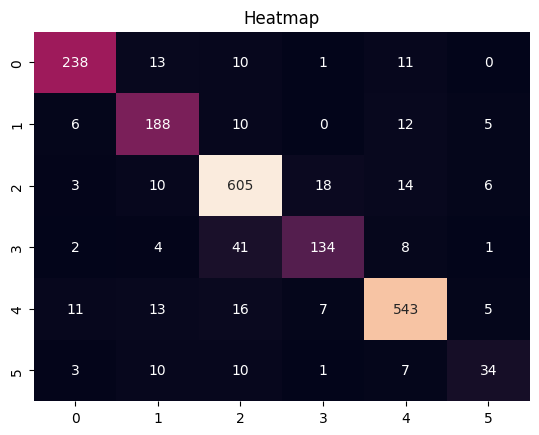

In [10]:
sns.heatmap(confusion_matrix(y_val,predictions),annot=True,fmt='d',cbar=False)
plt.title('Heatmap')

## Manual Testing

In [13]:
new_text = ["Caught in the grip of fear, uncertainty looms like a shadow over every step."]
new_text_vec = vectorizer.transform(new_text)
predicted = model_nb.predict(new_text_vec)

In [14]:
if predicted == 0:
    print("Anger")
elif predicted == 1:
    print("Fear")
elif predicted == 2:
    print("Joy")
elif predicted == 3:
    print("Love")
elif predicted == 4:
    print("Sadness")
elif predicted == 5:
    print("Surprise,")

Joy
